In [147]:
import pandas as pd
import numpy as np

# Load the data as a dataframe
df = pd.read_csv('./../data/titanic_train.csv')

In [148]:
Y = list(1.0*df['Survived'])

In [149]:
def compute_ratio_success(Y, Y_pred):
    assert type(Y) is list
    assert type(Y_pred) is list
    assert len(Y) == len(Y_pred)
    n_success = [(1 if round(y_pred) == y else 0) for (y, y_pred) in zip(Y, Y_pred)]
    return 1.0*sum(n_success)/len(Y)

In [150]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [151]:
Y_pred = [0.0]*len(df)
compute_ratio_success(Y, Y_pred)

0.6161616161616161

# Feature Engineering

In [152]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [153]:
df['IsWoman'] = 1.0*(df['Sex'] == "female")

In [154]:
del df['Name']
del df['Sex']
del df['Ticket']
del df['PassengerId']
del df['Cabin']

In [155]:
df.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsWoman
0,0,3,22.0,1,0,7.2500,S,0.0
1,1,1,38.0,1,0,71.2833,C,1.0
2,1,3,26.0,0,0,7.9250,S,1.0
3,1,1,35.0,1,0,53.1000,S,1.0
4,0,3,35.0,0,0,8.0500,S,0.0
5,0,3,NaN,0,0,8.4583,Q,0.0
6,0,1,54.0,0,0,51.8625,S,0.0
7,0,3,2.0,3,1,21.0750,S,0.0
8,1,3,27.0,0,2,11.1333,S,1.0
9,1,2,14.0,1,0,30.0708,C,1.0


In [156]:
df['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [157]:
# TODO: use Embarked

In [158]:
del df['Embarked']

In [159]:
X = df.copy()
del X['Survived']

In [160]:
for feature in list(X):
    print(X[feature].value_counts(dropna = False))

3    491
1    216
2    184
Name: Pclass, dtype: int64
NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5 

In [161]:
# The age is not always given. We remplace empty value with the mean.
X['Age'].fillna((X['Age'].mean()), inplace=True)

In [162]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
clf_trained = clf.fit(X, Y)

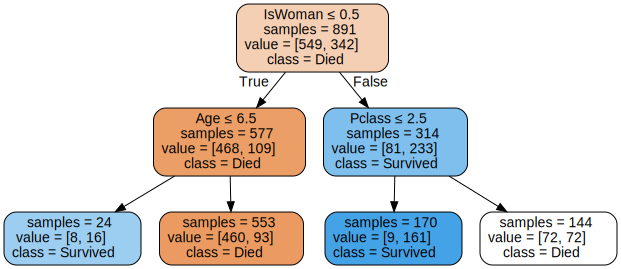

In [167]:
!pip install graphviz
import graphviz
dot_data = tree.export_graphviz(clf_trained, out_file=None, 
                         feature_names=list(X),  
                         filled=True, rounded=True, class_names=["Died", "Survived"], 
                         special_characters=True, impurity=False)  
graph = graphviz.Source(dot_data)  
graph 

In [168]:
compute_ratio_success(Y, list(clf_trained.predict(X)))

0.7957351290684624